In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter,MultipleLocator

import seaborn as sns


In [2]:
df_daily = pd.read_csv('META.csv')

In [3]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3235 non-null   object 
 1   Open    3235 non-null   float64
 2   High    3235 non-null   float64
 3   Low     3235 non-null   float64
 4   Close   3235 non-null   float64
 5   Volume  3235 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 151.8+ KB


In [4]:
df_daily['Date'] = pd.to_datetime(df_daily['Date'], format='%d-%m-%y')

df_daily['Date'].head()

0   2012-05-18
1   2012-05-21
2   2012-05-22
3   2012-05-23
4   2012-05-24
Name: Date, dtype: datetime64[ns]

In [4]:
df_daily.shape

(3235, 6)

In [5]:
# Kiểm tra xem có giá trị nào bị thiếu hay không
print(df_daily.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [6]:
df_daily.describe()

,Open,High,Low,Close,Volume
count,3235.000000,3235.000000,3235.000000,3235.000000,3.235000e+03
mean,193.443694,195.943246,190.956360,193.502589,2.909967e+07
std,143.066907,144.874230,141.119185,143.033983,2.560959e+07
min,18.011199,18.200477,17.483216,17.662531,4.726100e+06
25%,89.836829,90.872874,88.790826,90.145649,1.539615e+07
50%,166.733080,168.805154,164.561384,167.041885,2.153170e+07
75%,259.752764,264.295407,256.734303,260.335510,3.319535e+07
max,736.000000,740.909973,725.619995,736.669983,5.735764e+08


In [9]:
from scipy import stats
# Tính Skewness 
print("Skewness of Close Prices:", stats.skew(df_daily['Close']))
print("Kurtosis of Close Prices:", stats.kurtosis(df_daily['Close']))


Skewness of Close Prices: 1.339295751747319
Kurtosis of Close Prices: 1.5990829260528203


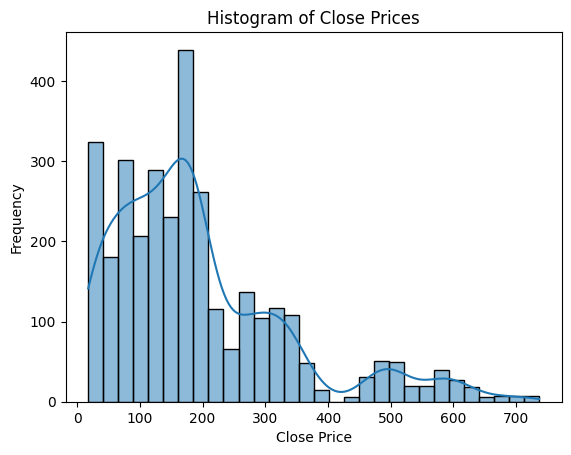

In [10]:
# Histogram 
sns.histplot(df_daily['Close'], bins=30, kde=True)
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


In [32]:
# Tính Skweness và Kurtosis cho volume
print("Skewness of Volume:", stats.skew(df_daily['Volume']))

print("Kurtosis of Volume:", stats.kurtosis(df_daily['Volume']))

Skewness of Volume: 5.971615292931175
Kurtosis of Volume: 81.96427107257709


In [16]:
# Tính phương sai
print("Variance of Close Prices:", df_daily['Close'].var())

# Tính độ lệch chuẩn
print("Standard Deviation of Close Prices:", df_daily['Close'].std())

Variance of Close Prices: 20458.720183202044
Standard Deviation of Close Prices: 143.03398261672658


In [19]:
# Tính phương sai cho volume
print("Variance of Volume:", df_daily['Volume'].var())
# Tính độ lệch chuẩn cho volume
print("Standard Deviation of Volume:", df_daily['Volume'].std())

Variance of Volume: 655851031255651.0
Standard Deviation of Volume: 25609588.6584625


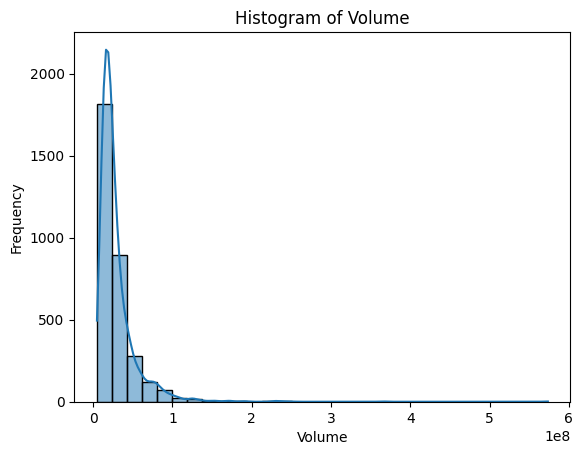

In [35]:
# Histogram cho Volume
sns.histplot(df_daily['Volume'], bins=30, kde=True)
plt.title('Histogram of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

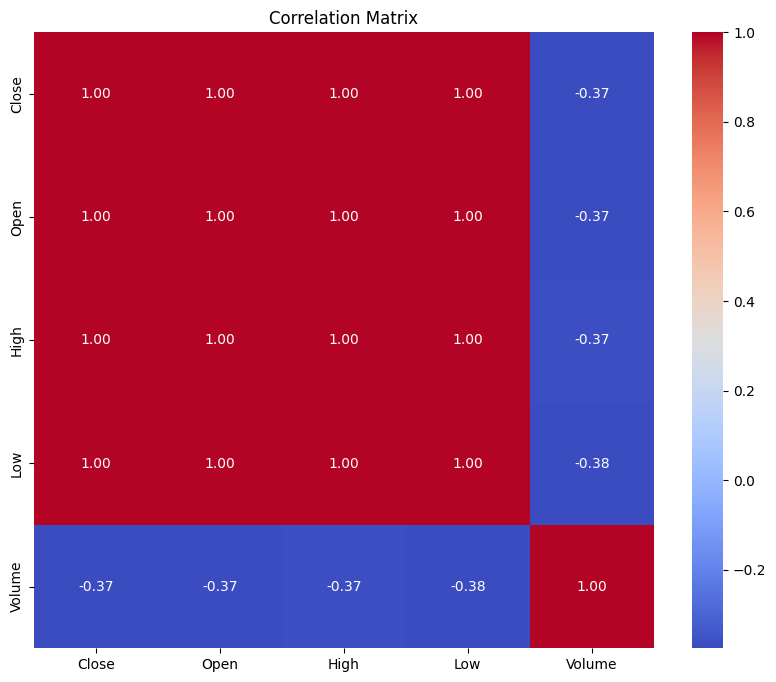

In [3]:
# Correlation matrix
corr = df_daily[['Close','Open', 'High', 'Low', 'Volume']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:

date_range = df_daily['Date'].max() - df_daily['Date'].min()

print(f"Số ngày trong khoảng dữ liệu: {date_range.days} ngày")


Số ngày trong khoảng dữ liệu: 4688 ngày


In [11]:
# Range giá cổ phiếu
Close_range = df_daily['Close'].max() - df_daily['Close'].min()

print(f"Khoảng dữ liệu của giá đóng cửa: {Close_range}")

Khoảng dữ liệu của giá đóng cửa: 719.0074520000001


In [12]:
# Range Volume
Volume_range = df_daily['Volume'].max() - df_daily['Volume'].min()

print(f"Khoảng dữ liệu của khối lượng giao dịch: {Volume_range}")

Khoảng dữ liệu của khối lượng giao dịch: 568850300


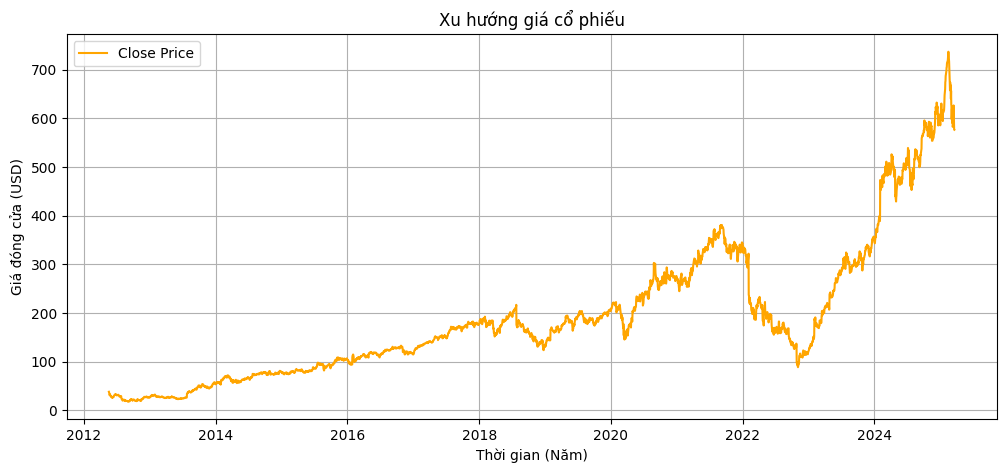

In [14]:
# Xu hướng giá cổ phiếu qua các năm
plt.figure(figsize=(12, 5))
plt.plot(df_daily['Date'], df_daily['Close'], label='Close Price', color = 'orange')
plt.title('Xu hướng giá cổ phiếu')
plt.xlabel('Thời gian (Năm)')
plt.ylabel('Giá đóng cửa (USD)')
plt.legend()
plt.grid(True)
plt.show()

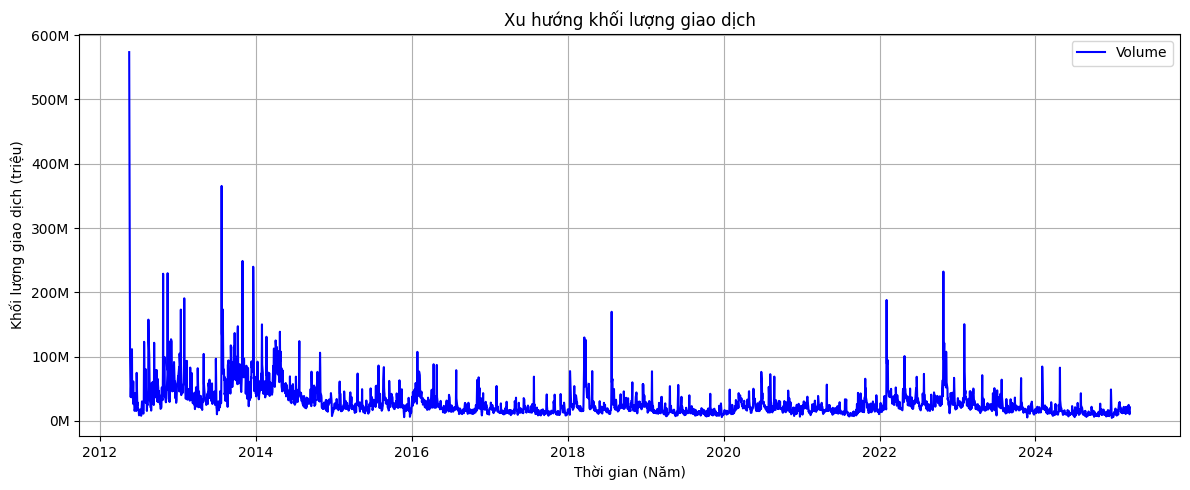

In [21]:
# Xu hướng khối lượng giao dịch
plt.figure(figsize=(12, 5))
plt.plot(df_daily['Date'], df_daily['Volume'], label='Volume', color='blue')

# Mỗi 100 triệu = 1e8
plt.gca().yaxis.set_major_locator(MultipleLocator(1e8))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))  # Hiện theo triệu (M)

plt.title('Xu hướng khối lượng giao dịch')
plt.xlabel('Thời gian (Năm)')
plt.ylabel('Khối lượng giao dịch (triệu)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# Phân tích dữ liệu theo quý
df_quarter = pd.read_csv('META_quarter.csv')

In [6]:
df_quarter['Date'] = pd.to_datetime(df_quarter['Date'], format='%d-%m-%y')

In [7]:
df_quarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           52 non-null     datetime64[ns]
 1   Quarter        52 non-null     int64         
 2   Year           52 non-null     int64         
 3   Revenue        51 non-null     float64       
 4   Cost           51 non-null     float64       
 5   Net Income     51 non-null     float64       
 6   Average Price  52 non-null     float64       
 7   Total Volume   52 non-null     int64         
 8   Max Price      52 non-null     float64       
 9   Min Price      52 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 4.2 KB


In [8]:
df_quarter.shape

(52, 10)

In [43]:
df_quarter[['Average Price', 'Revenue', 'Cost', 'Net Income', 'Total Volume', 'Max Price', 'Min Price', 'Quarterly Change (%)']].describe()

,Average Price,Revenue,Cost,Net Income,Total Volume,Max Price,Min Price,Quarterly Change (%)
count,52.000000,51.000000,51.000000,51.000000,5.200000e+01,52.000000,52.000000,52.000000
mean,192.004394,16736.411765,10362.843137,5252.843137,1.799594e+09,214.109527,168.620267,7.174673
std,141.923462,13284.158173,8219.672415,4749.113136,8.803739e+08,160.174821,129.644956,14.768402
min,22.621000,381.000000,885.000000,-157.000000,8.127769e+08,28.132536,17.662531,-31.983000
25%,88.631000,4271.500000,2905.500000,851.000000,1.165607e+09,95.642147,80.624516,1.667250
50%,167.063000,13727.000000,7946.000000,4652.000000,1.502486e+09,182.403229,142.156960,5.659000
75%,248.496000,28358.500000,17521.000000,7626.500000,2.226382e+09,293.446533,212.381222,12.216250
max,645.170501,48385.000000,25766.000000,20838.000000,4.584911e+09,736.670000,576.360000,56.193000


In [59]:
# Giai đoạn 2012 - 2014: 

# Giá cao nhất năm 2012:
print("Highest Price in 2012:", df_quarter[df_quarter['Year'] == 2012]['Max Price'].max())
print("Lowest Price in 2012:", df_quarter[df_quarter['Year'] == 2012]['Min Price'].min())


Highest Price in 2012: 38.08452225
Lowest Price in 2012: 17.6625309


In [60]:
# Giá cao nhất năm 2013:
print("Highest Price in 2013:", df_quarter[df_quarter['Year'] == 2013]['Max Price'].max())
print("Lowest Price in 2013:", df_quarter[df_quarter['Year'] == 2013]['Min Price'].min())

# Tỷ lệ thay đổi so với năm 2012
change_2013 = (df_quarter[df_quarter['Year'] == 2013]['Average Price'].mean() - df_quarter[df_quarter['Year'] == 2012]['Average Price'].mean()) / df_quarter[df_quarter['Year'] == 2012]['Average Price'].mean() * 100
print("Change from 2012 to 2013: {:.2f}%".format(change_2013))

Highest Price in 2013: 57.7394371
Lowest Price in 2013: 22.81285477
Change from 2012 to 2013: 40.96%


In [61]:
# Giá cao nhất năm 2014:
print("Highest Price in 2014:", df_quarter[df_quarter['Year'] == 2014]['Max Price'].max())
print("Lowest Price in 2014:", df_quarter[df_quarter['Year'] == 2014]['Min Price'].min())


Highest Price in 2014: 81.1400528
Lowest Price in 2014: 53.32629395


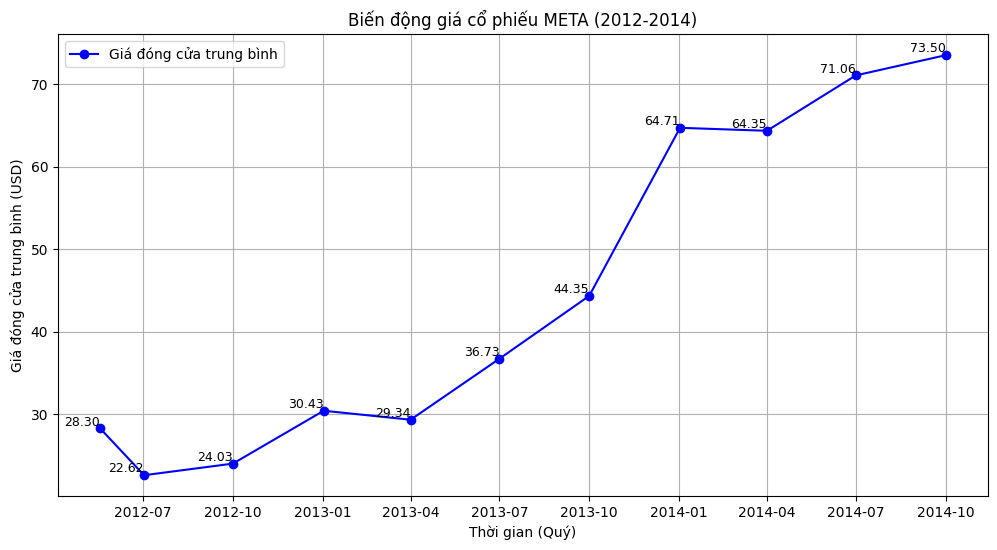

In [62]:
# Giai đoạn 2012 - 2014:
df_quarter_2012_2014 = df_quarter[(df_quarter['Date'].dt.year >= 2012 ) & (df_quarter['Date'].dt.year <= 2014)]

plt.figure(figsize=(12, 6))
plt.plot(df_quarter_2012_2014['Date'], df_quarter_2012_2014['Average Price'], marker = 'o', label='Giá đóng cửa trung bình', color = 'blue')

for i, txt in enumerate(df_quarter_2012_2014['Average Price']):
    plt.text(df_quarter_2012_2014['Date'].iloc[i], txt, f'{txt:.2f}', fontsize=9, verticalalignment='bottom', horizontalalignment='right')

plt.title('Biến động giá cổ phiếu META (2012-2014)')
plt.xlabel('Thời gian (Quý)')
plt.ylabel('Giá đóng cửa trung bình (USD)')

plt.legend()
plt.grid(True)

plt.show()

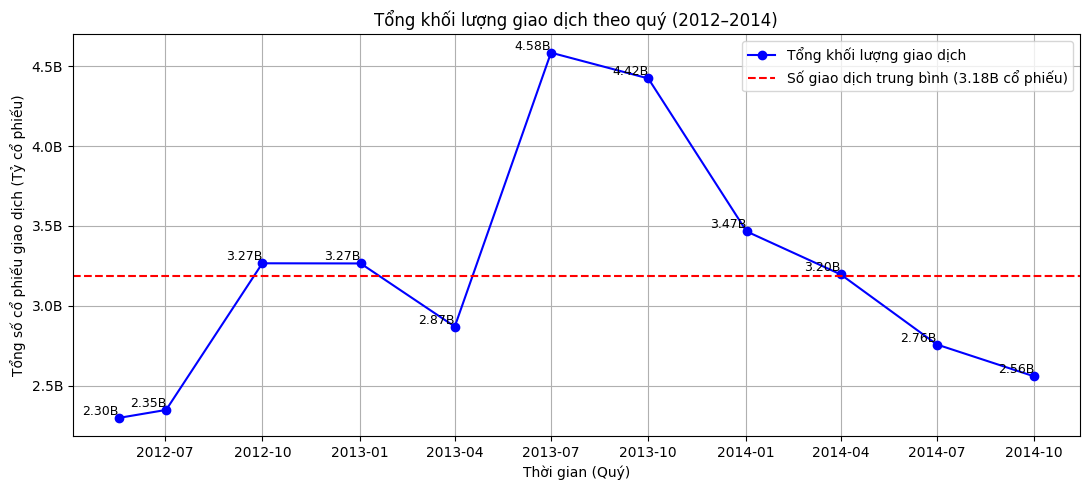

In [63]:
from matplotlib.ticker import MultipleLocator, FuncFormatter

# Tính trung bình tổng khối lượng giao dịch theo quý
avg_volume = df_quarter_2012_2014['Total Volume'].mean()

plt.figure(figsize=(11, 5))

# Vẽ line chart cho khối lượng giao dịch
plt.plot(
    df_quarter_2012_2014['Date'],
    df_quarter_2012_2014['Total Volume'],
    marker='o',
    label='Tổng khối lượng giao dịch',
    color='blue'
)

# Đường trung bình
plt.axhline(
    y=avg_volume,
    color='r',
    linestyle='--',
    label=f'Số giao dịch trung bình ({avg_volume / 1e9:.2f}B cổ phiếu)'
)

# Hiện giá trị tại từng điểm (đơn vị tỷ cổ phiếu)
for i, txt in enumerate(df_quarter_2012_2014['Total Volume']):
    plt.text(
        df_quarter_2012_2014['Date'].iloc[i],
        txt,
        f'{txt / 1e9:.2f}B',
        fontsize=9,
        verticalalignment='bottom',
        horizontalalignment='right'
    )

# Set trục Y: mỗi 0.5 tỷ cổ phiếu
plt.gca().yaxis.set_major_locator(MultipleLocator(0.5e9))  # 500 triệu = 0.5B
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B'))

# Labels và title
plt.title('Tổng khối lượng giao dịch theo quý (2012–2014)')
plt.xlabel('Thời gian (Quý)')
plt.ylabel('Tổng số cổ phiếu giao dịch (Tỷ cổ phiếu)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [64]:
# Giai đoạn 2015 - 2018: 

# Giá cao nhất năm 2015:
print("Highest Price in 2015:", df_quarter[df_quarter['Year'] == 2015]['Max Price'].max())
print("Lowest Price in 2015:", df_quarter[df_quarter['Year'] == 2015]['Min Price'].min())


Highest Price in 2015: 108.5951691
Lowest Price in 2015: 73.76821136


In [65]:
# Giá cao nhất năm 2016:
print("Highest Price in 2016:", df_quarter[df_quarter['Year'] == 2016]['Max Price'].max())
print("Lowest Price in 2016:", df_quarter[df_quarter['Year'] == 2016]['Min Price'].min())

Highest Price in 2016: 132.7728119
Lowest Price in 2016: 93.80168915


In [66]:
# Giá cao nhất năm 2017:
print("Highest Price in 2017:", df_quarter[df_quarter['Year'] == 2017]['Max Price'].max())
print("Lowest Price in 2017:", df_quarter[df_quarter['Year'] == 2017]['Min Price'].min())

Highest Price in 2017: 182.3334961
Lowest Price in 2017: 116.4153061


In [67]:
# Giá cao nhất năm 2018:
print("Highest Price in 2018:", df_quarter[df_quarter['Year'] == 2018]['Max Price'].max())
print("Lowest Price in 2018:", df_quarter[df_quarter['Year'] == 2018]['Min Price'].min())

Highest Price in 2018: 216.6723328
Lowest Price in 2018: 123.5878906


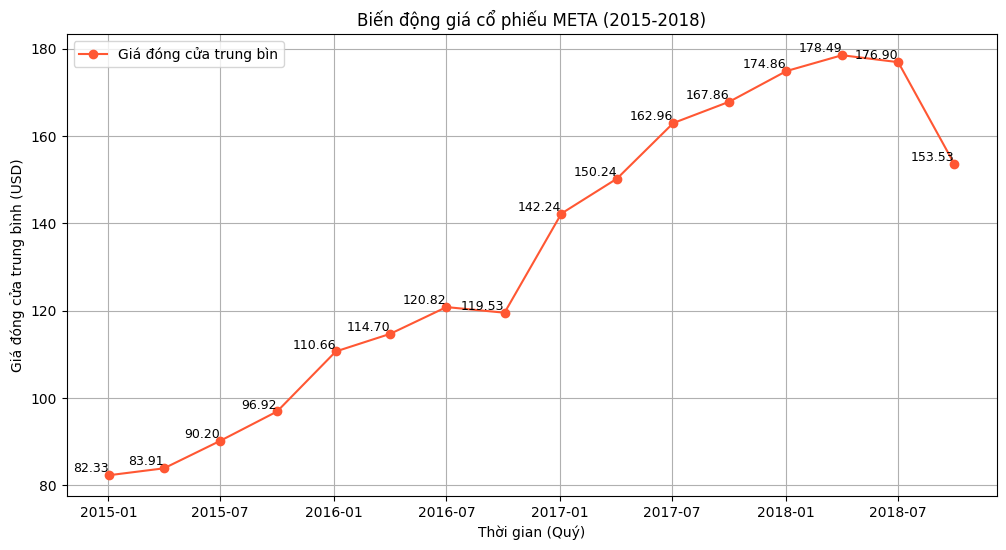

In [68]:
# Giai đoạn 2015 - 2018:
df_quarter_2015_2018 = df_quarter[(df_quarter['Date'].dt.year >= 2015 ) & (df_quarter['Date'].dt.year <= 2018)]

# Vẽ biểu đồ cho giá đóng cửa trung bình theo quý
plt.figure(figsize=(12, 6))
plt.plot(df_quarter_2015_2018['Date'], df_quarter_2015_2018['Average Price'], marker='o', label='Giá đóng cửa trung bìn', color= '#FF5733')

for i, txt in enumerate(df_quarter_2015_2018['Average Price']):
    plt.text(df_quarter_2015_2018['Date'].iloc[i], txt, f'{txt:.2f}', fontsize=9, verticalalignment='bottom', horizontalalignment='right')

plt.title('Biến động giá cổ phiếu META (2015-2018)')
plt.xlabel('Thời gian (Quý)')
plt.ylabel('Giá đóng cửa trung bình (USD)')
plt.grid(True)

plt.legend()

plt.show()


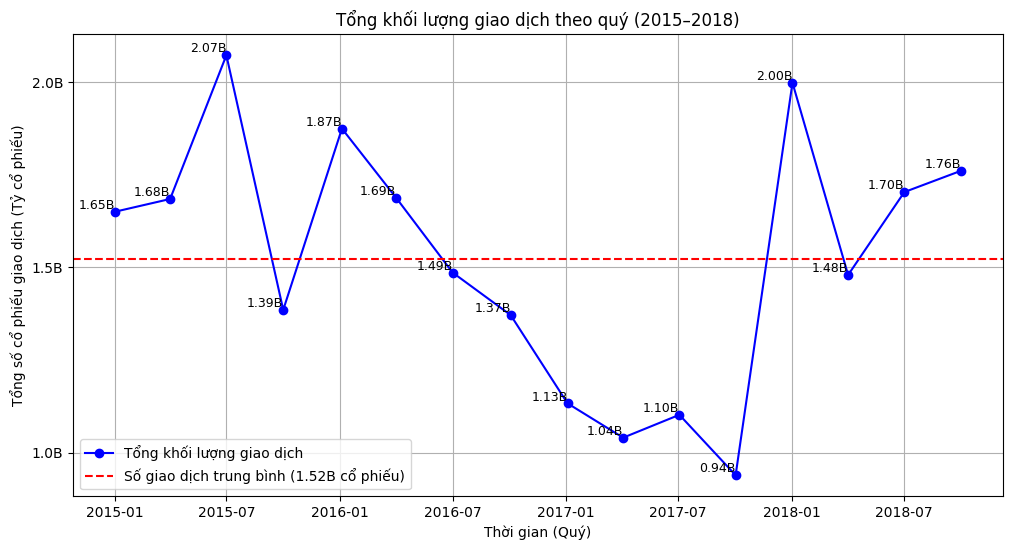

In [ ]:
# Voume trung bình theo quý
avg_volume = df_quarter_2015_2018['Total Volume'].mean()

plt.figure(figsize=(12, 6))
# Vẽ line chart cho khối lượng giao dịch
plt.plot(
    df_quarter_2015_2018['Date'],
    df_quarter_2015_2018['Total Volume'],
    marker='o',
    label='Tổng khối lượng giao dịch',
    color='blue'
)

# Đường trung bình
plt.axhline(
    y=avg_volume,
    color='r',
    linestyle='--',
    label=f'Số giao dịch trung bình ({avg_volume / 1e9:.2f}B cổ phiếu)'
)

# Hiện giá trị tại từng điểm (đơn vị tỷ cổ phiếu)
for i, txt in enumerate(df_quarter_2015_2018['Total Volume']):
    plt.text(
        df_quarter_2015_2018['Date'].iloc[i],
        txt,
        f'{txt / 1e9:.2f}B',
        fontsize=9,
        verticalalignment='bottom',
        horizontalalignment='right'
    )

# Set trục Y: mỗi 0.5 tỷ cổ phiếu
plt.gca().yaxis.set_major_locator(MultipleLocator(0.5e9))  # 500 triệu = 0.5B
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B'))

# Labels và title
plt.title('Tổng khối lượng giao dịch theo quý (2015–2018)')
plt.xlabel('Thời gian (Quý)')
plt.ylabel('Tổng số cổ phiếu giao dịch (Tỷ cổ phiếu)')
plt.legend()
plt.grid(True)

plt.show()

In [70]:
# Giai đoạn 2019 - 2021:

# Giá cao nhất và thấp nhất năm 2019:
print("Highest Price in 2019:", df_quarter[df_quarter['Year'] == 2019]['Max Price'].max())
print("Lowest Price in 2019:", df_quarter[df_quarter['Year'] == 2019]['Min Price'].min())

Highest Price in 2019: 207.3081055
Lowest Price in 2019: 131.238678


In [71]:
# Giá cao nhất và thấp nhất năm 2020:
print("Highest Price in 2020:", df_quarter[df_quarter['Year'] == 2020]['Max Price'].max())
print("Lowest Price in 2020:", df_quarter[df_quarter['Year'] == 2020]['Min Price'].min())

Highest Price in 2020: 302.75354
Lowest Price in 2020: 145.454361


In [72]:
# Giá cao nhất và thấp nhất năm 2021:
print("Highest Price in 2021:", df_quarter[df_quarter['Year'] == 2021]['Max Price'].max())
print("Lowest Price in 2021:", df_quarter[df_quarter['Year'] == 2021]['Min Price'].min())

Highest Price in 2021: 380.725647
Lowest Price in 2021: 244.7052307


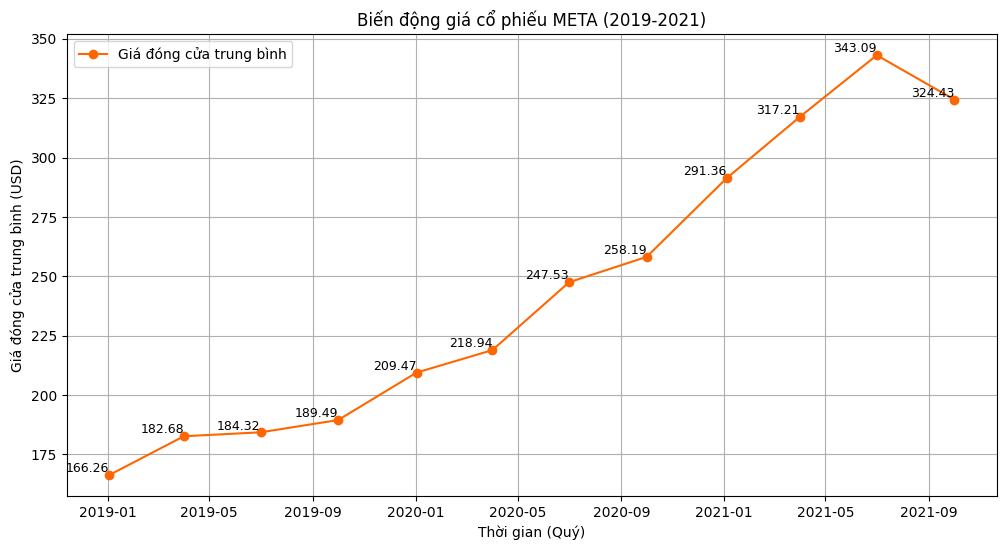

In [73]:
# Giai đoạn 2019 - 2021:
df_quarter_2019_2021 = df_quarter[(df_quarter['Date'].dt.year >= 2019 ) & (df_quarter['Date'].dt.year <= 2021)]

# Vẽ biểu đồ cho giá đóng cửa trung bình theo quý
plt.figure(figsize=(12, 6))
plt.plot(df_quarter_2019_2021['Date'], df_quarter_2019_2021['Average Price'], marker='o', label='Giá đóng cửa trung bình', color= '#FF6600')

for i, txt in enumerate(df_quarter_2019_2021['Average Price']):
    plt.text(df_quarter_2019_2021['Date'].iloc[i], txt, f'{txt:.2f}', fontsize=9, verticalalignment='bottom', horizontalalignment='right')

plt.title('Biến động giá cổ phiếu META (2019-2021)')
plt.xlabel('Thời gian (Quý)')
plt.ylabel('Giá đóng cửa trung bình (USD)')
plt.grid(True)

plt.legend()
plt.show()


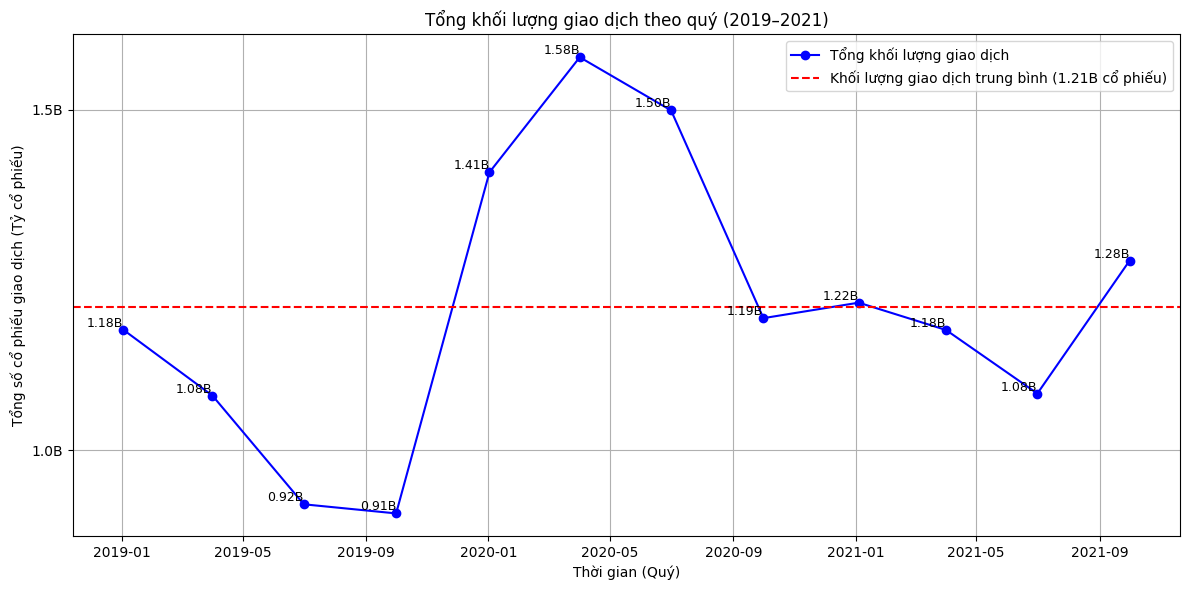

In [74]:
# Khối lượng giao dịch giai đoạn (2019-2021)

# Tính trung bình tổng khối lượng giao dịch theo quý
avg_volume = df_quarter_2019_2021['Total Volume'].mean()

plt.figure(figsize=(12, 6))

# Vẽ line chart cho khối lượng giao dịch
plt.plot(
    df_quarter_2019_2021['Date'],
    df_quarter_2019_2021['Total Volume'],
    marker='o',
    label='Tổng khối lượng giao dịch',
    color='blue'
)

# Đường trung bình
plt.axhline(
    y=avg_volume,
    color='r',
    linestyle='--',
    label=f'Khối lượng giao dịch trung bình ({avg_volume / 1e9:.2f}B cổ phiếu)'
)

# Hiện giá trị tại từng điểm (đơn vị tỷ cổ phiếu)
for i, txt in enumerate(df_quarter_2019_2021['Total Volume']):
    plt.text(
        df_quarter_2019_2021['Date'].iloc[i],
        txt,
        f'{txt / 1e9:.2f}B',
        fontsize=9,
        verticalalignment='bottom',
        horizontalalignment='right'
    )

# Set trục Y: mỗi 0.5 tỷ cổ phiếu
plt.gca().yaxis.set_major_locator(MultipleLocator(0.5e9))  # 500 triệu = 0.5B
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B'))

# Labels và title
plt.title('Tổng khối lượng giao dịch theo quý (2019–2021)')
plt.xlabel('Thời gian (Quý)')
plt.ylabel('Tổng số cổ phiếu giao dịch (Tỷ cổ phiếu)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [75]:
# Giai đoạn 2022 - 2023:

# Giá cao nhất và thấp nhất năm 2022:
print("Highest Price in 2022:", df_quarter[df_quarter['Year'] == 2022]['Max Price'].max())
print("Lowest Price in 2022:", df_quarter[df_quarter['Year'] == 2022]['Min Price'].min())

Highest Price in 2022: 337.251709
Lowest Price in 2022: 88.5716629


In [76]:
# Giá cao nhất và thấp nhất năm 2023:
print("Highest Price in 2023:", df_quarter[df_quarter['Year'] == 2023]['Max Price'].max())
print("Lowest Price in 2023:", df_quarter[df_quarter['Year'] == 2023]['Min Price'].min())

Highest Price in 2023: 356.9564514
Lowest Price in 2023: 124.2653122


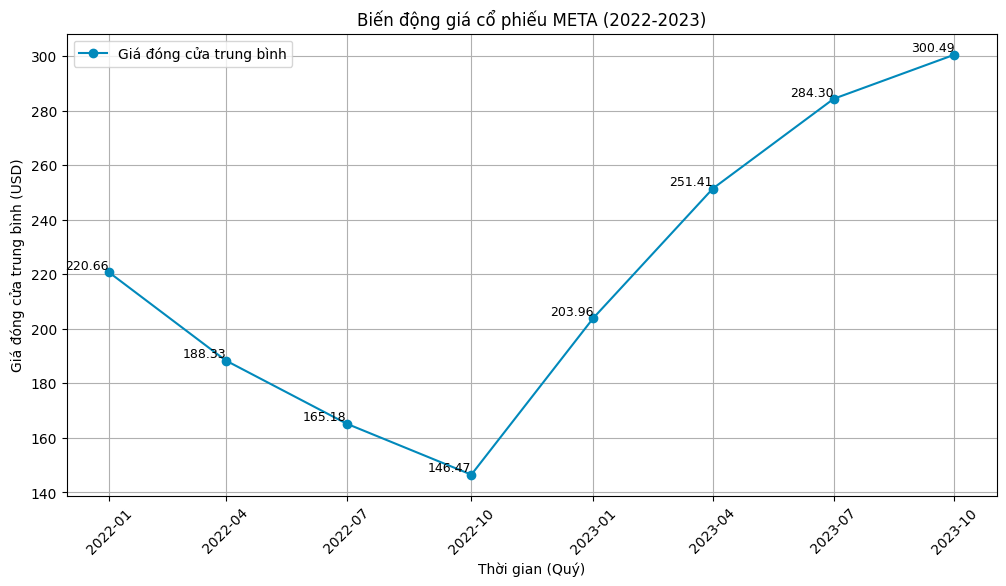

In [77]:
# Giai đoạn 2022 - 2023:
df_quarter_2022_2023 = df_quarter[(df_quarter['Date'].dt.year >= 2022 ) & (df_quarter['Date'].dt.year <= 2023)]

# Vẽ biểu đồ cho giá đóng cửa trung bình theo quý
plt.figure(figsize=(12, 6))
plt.plot(df_quarter_2022_2023['Date'], df_quarter_2022_2023['Average Price'], marker='o', label='Giá đóng cửa trung bình', color= '#0189BB')
plt.xticks(df_quarter_2022_2023['Date'], df_quarter_2022_2023['Date'].dt.strftime('%Y-%m'), rotation=45)
for i, txt in enumerate(df_quarter_2022_2023['Average Price']):
    plt.text(df_quarter_2022_2023['Date'].iloc[i], txt, f'{txt:.2f}', fontsize=9, verticalalignment='bottom', horizontalalignment='right')

plt.title('Biến động giá cổ phiếu META (2022-2023)')
plt.xlabel('Thời gian (Quý)')
plt.ylabel('Giá đóng cửa trung bình (USD)')
plt.grid(True)
plt.legend()

plt.show()

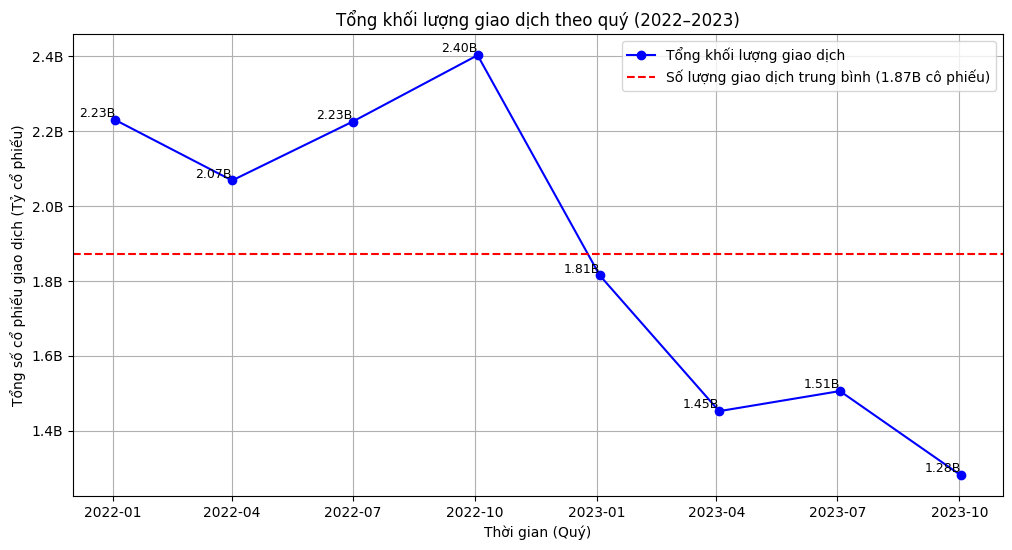

In [78]:
# Khối lượng giao dịch giai đoạn (2022-2023)

# Tính trung bình tổng khối lượng giao dịch theo quý
avg_volume = df_quarter_2022_2023['Total Volume'].mean()

plt.figure(figsize=(12, 6))
# Vẽ line chart cho khối lượng giao dịch
plt.plot(
    df_quarter_2022_2023['Date'],
    df_quarter_2022_2023['Total Volume'],
    marker='o',
    label='Tổng khối lượng giao dịch',
    color='blue'
)

# Đường trung bình
plt.axhline(
    y=avg_volume,
    color='r',
    linestyle='--',
    label=f'Số lượng giao dịch trung bình ({avg_volume / 1e9:.2f}B cô phiếu)'
)

# Hiện giá trị tại từng điểm (đơn vị tỷ cổ phiếu)
for i, txt in enumerate(df_quarter_2022_2023['Total Volume']):
    plt.text(
        df_quarter_2022_2023['Date'].iloc[i],
        txt,
        f'{txt / 1e9:.2f}B',
        fontsize=9,
        verticalalignment='bottom',
        horizontalalignment='right'
    )

# Set trục Y: mỗi 0.5 tỷ cổ phiếu
plt.gca().yaxis.set_major_locator(MultipleLocator(0.2e9))  # 500 triệu = 0.5B
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B'))

# Labels và title
plt.title('Tổng khối lượng giao dịch theo quý (2022–2023)')
plt.xlabel('Thời gian (Quý)')
plt.ylabel('Tổng số cổ phiếu giao dịch (Tỷ cổ phiếu)')
plt.legend()
plt.grid(True)

plt.show()

In [79]:
# Giai đoạn 2024 - 2025:
# Giá cao nhất và thấp nhất năm 2024:
print("Highest Price in 2024:", df_quarter[df_quarter['Year'] == 2024]['Max Price'].max())
print("Lowest Price in 2024:", df_quarter[df_quarter['Year'] == 2024]['Min Price'].min())

Highest Price in 2024: 632.1700439
Lowest Price in 2024: 343.1591492


In [80]:
# Giá cao nhất và thấp nhất quý 1 năm 2025:
print("Highest Price in Q1 2025:", df_quarter[df_quarter['Year'] == 2025]['Max Price'].max())
print("Lowest Price in Q1 2025:", df_quarter[df_quarter['Year'] == 2025]['Min Price'].min())

Highest Price in Q1 2025: 736.67
Lowest Price in Q1 2025: 576.36


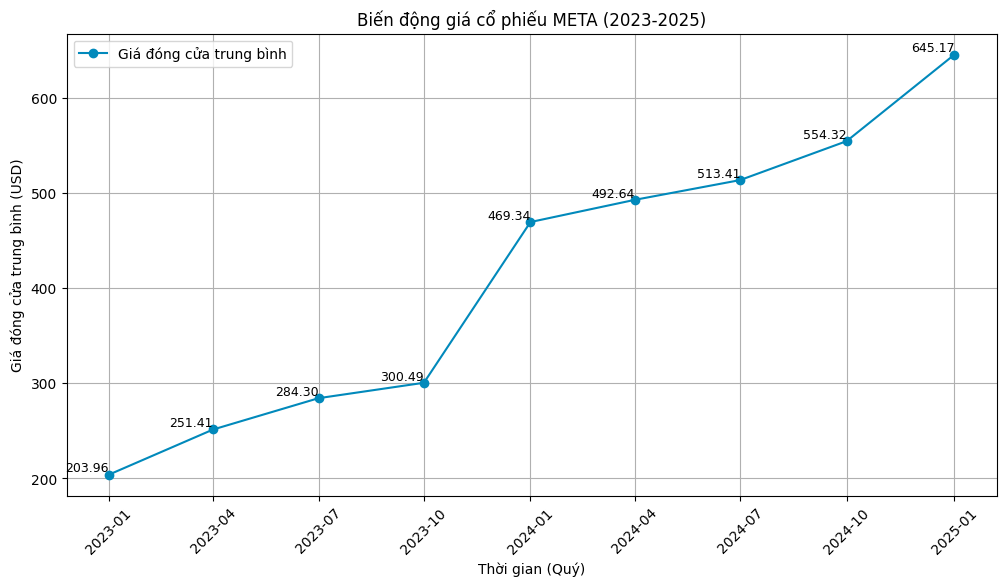

In [81]:
# Giai đoạn 2024 - 2025:
df_quarter_2024_2025 = df_quarter[(df_quarter['Date'].dt.year >= 2023 ) & (df_quarter['Date'].dt.year <= 2025)]

# Vẽ biểu đồ cho giá đóng cửa trung bình theo quý
plt.figure(figsize=(12, 6))
plt.plot(df_quarter_2024_2025['Date'], df_quarter_2024_2025['Average Price'], marker='o', label='Giá đóng cửa trung bình', color= '#0189BB')

plt.xticks(df_quarter_2024_2025['Date'], df_quarter_2024_2025['Date'].dt.strftime('%Y-%m'), rotation=45)

for i, txt in enumerate(df_quarter_2024_2025['Average Price']):
    plt.text(df_quarter_2024_2025['Date'].iloc[i], txt, f'{txt:.2f}', fontsize=9, verticalalignment='bottom', horizontalalignment='right')

plt.title('Biến động giá cổ phiếu META (2023-2025)')
plt.xlabel('Thời gian (Quý)')
plt.ylabel('Giá đóng cửa trung bình (USD)')
plt.grid(True)

plt.legend()

plt.show()

<Figure size 1200x600 with 0 Axes>

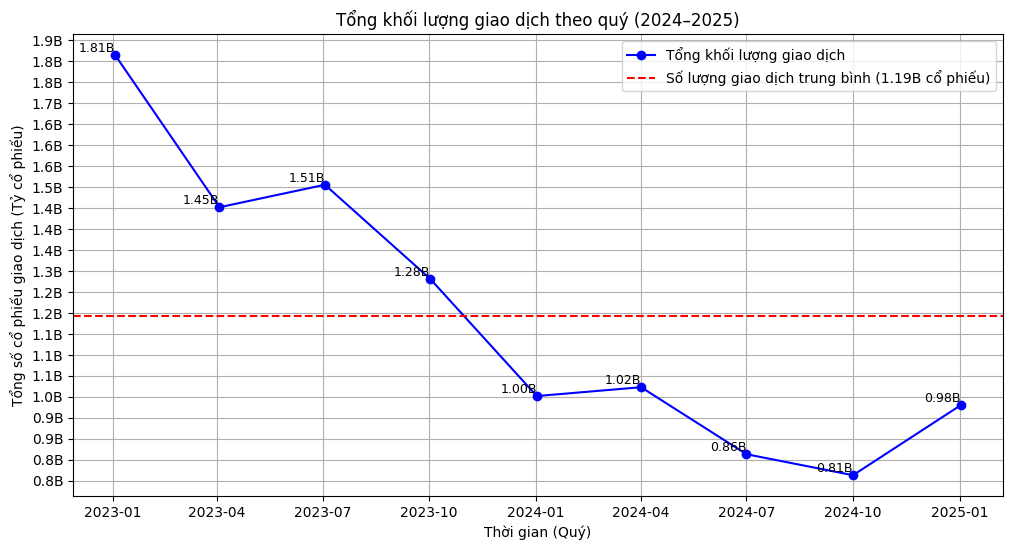

In [82]:
# Vẽ biểu đồ cho khối lượng giao dịch giai đoạn (2024-2025)
plt.figure(figsize=(12, 6))

# Tính trung bình tổng khối lượng giao dịch theo quý
avg_volume = df_quarter_2024_2025['Total Volume'].mean()

plt.figure(figsize=(12, 6))
# Vẽ line chart cho khối lượng giao dịch
plt.plot(
    df_quarter_2024_2025['Date'],
    df_quarter_2024_2025['Total Volume'],
    marker='o',
    label='Tổng khối lượng giao dịch',
    color='blue'
)

# Đường trung bình
plt.axhline(
    y=avg_volume,
    color='r',
    linestyle='--',
    label=f'Số lượng giao dịch trung bình ({avg_volume / 1e9:.2f}B cổ phiếu)'
)

# Hiện giá trị tại từng điểm (đơn vị tỷ cổ phiếu)
for i, txt in enumerate(df_quarter_2024_2025['Total Volume']):
    plt.text(
        df_quarter_2024_2025['Date'].iloc[i],
        txt,
        f'{txt / 1e9:.2f}B',
        fontsize=9,
        verticalalignment='bottom',
        horizontalalignment='right'
    )

# Set trục Y: mỗi 0.5 tỷ cổ phiếu
plt.gca().yaxis.set_major_locator(MultipleLocator(0.5e8))  # 500 triệu = 0.5B
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B'))

# Labels và title
plt.title('Tổng khối lượng giao dịch theo quý (2024–2025)')
plt.xlabel('Thời gian (Quý)')
plt.ylabel('Tổng số cổ phiếu giao dịch (Tỷ cổ phiếu)')
plt.legend()
plt.grid(True)

plt.show()



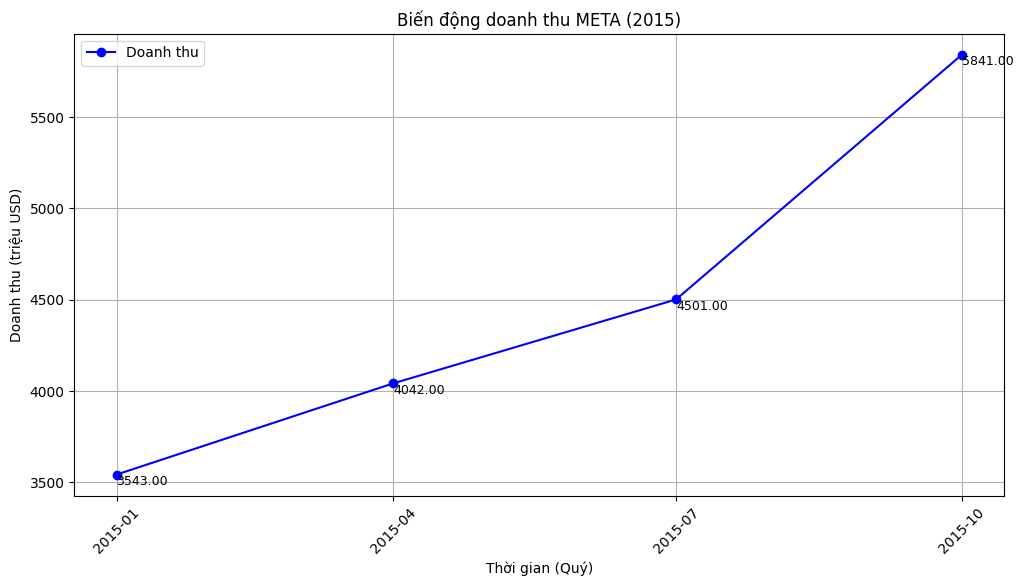

In [83]:
df_test = df_quarter[df_quarter['Date'].dt.year == 2015]

plt.figure(figsize=(12, 6))

plt.plot(df_test['Date'], df_test['Revenue'], marker='o', label='Doanh thu', color='blue')

plt.title('Biến động doanh thu META (2015)')
for i, txt in enumerate(df_test['Revenue']):
    plt.text(df_test['Date'].iloc[i], txt, f'{txt:.2f}', fontsize=9, verticalalignment='top', horizontalalignment='left')

plt.xlabel('Thời gian (Quý)')
plt.ylabel('Doanh thu (triệu USD)')
plt.xticks(df_test['Date'], df_test['Date'].dt.strftime('%Y-%m'), rotation=45)
plt.grid(True)

plt.legend()

plt.show()

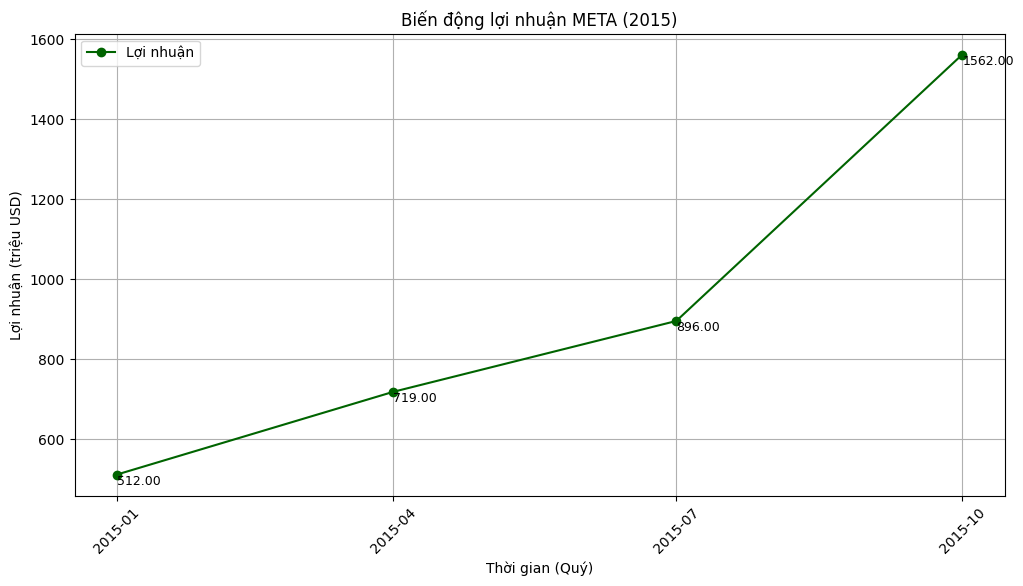

In [84]:
# Doanh thu và lợi nhuận năm 2015
df_test = df_quarter[df_quarter['Date'].dt.year == 2015]

plt.figure(figsize=(12, 6))

plt.plot(df_test['Date'], df_test['Net Income'], marker='o', label='Lợi nhuận', color='darkgreen')

plt.title('Biến động lợi nhuận META (2015)')
for i, txt in enumerate(df_test['Net Income']):
    plt.text(df_test['Date'].iloc[i], txt, f'{txt:.2f}', fontsize=9, verticalalignment='top', horizontalalignment='left')

plt.xlabel('Thời gian (Quý)')
plt.ylabel('Lợi nhuận (triệu USD)')
plt.xticks(df_test['Date'], df_test['Date'].dt.strftime('%Y-%m'), rotation=45)
plt.grid(True)

plt.legend()

plt.show()



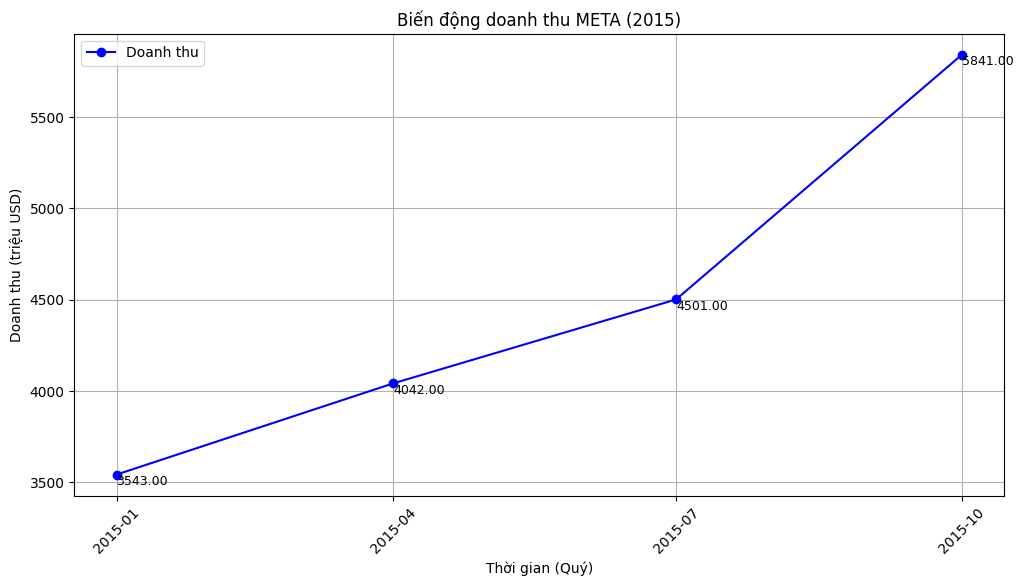

In [85]:
# Doanh thu năm 2015
df_test = df_quarter[df_quarter['Date'].dt.year == 2015]

plt.figure(figsize=(12, 6))

plt.plot(df_test['Date'], df_test['Revenue'], marker='o', label='Doanh thu', color='blue')

plt.title('Biến động doanh thu META (2015)')
for i, txt in enumerate(df_test['Revenue']):
    plt.text(df_test['Date'].iloc[i], txt, f'{txt:.2f}', fontsize=9, verticalalignment='top', horizontalalignment='left')

plt.xlabel('Thời gian (Quý)')
plt.ylabel('Doanh thu (triệu USD)')
plt.xticks(df_test['Date'], df_test['Date'].dt.strftime('%Y-%m'), rotation=45)
plt.grid(True)

plt.legend()

plt.show()

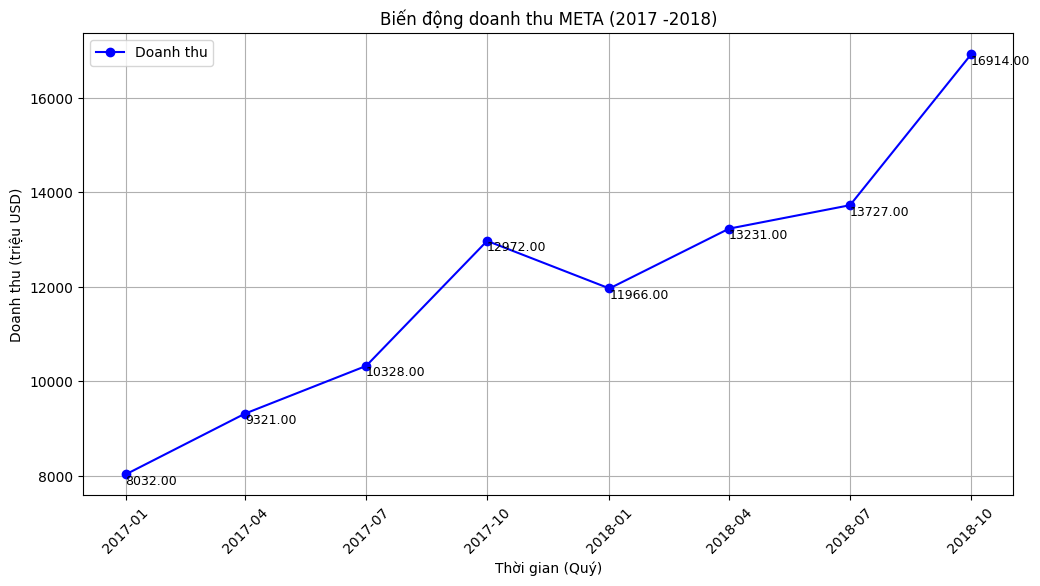

In [86]:
# Doanh thu 2017 - 2018:
# Doanh thu năm 2015
df_test = df_quarter[(df_quarter['Date'].dt.year >= 2017) & (df_quarter['Date'].dt.year <= 2018) ]

plt.figure(figsize=(12, 6))

plt.plot(df_test['Date'], df_test['Revenue'], marker='o', label='Doanh thu', color='blue')

plt.title('Biến động doanh thu META (2017 -2018)')
for i, txt in enumerate(df_test['Revenue']):
    plt.text(df_test['Date'].iloc[i], txt, f'{txt:.2f}', fontsize=9, verticalalignment='top', horizontalalignment='left')

plt.xlabel('Thời gian (Quý)')
plt.ylabel('Doanh thu (triệu USD)')
plt.xticks(df_test['Date'], df_test['Date'].dt.strftime('%Y-%m'), rotation=45)
plt.grid(True)

plt.legend()

plt.show()

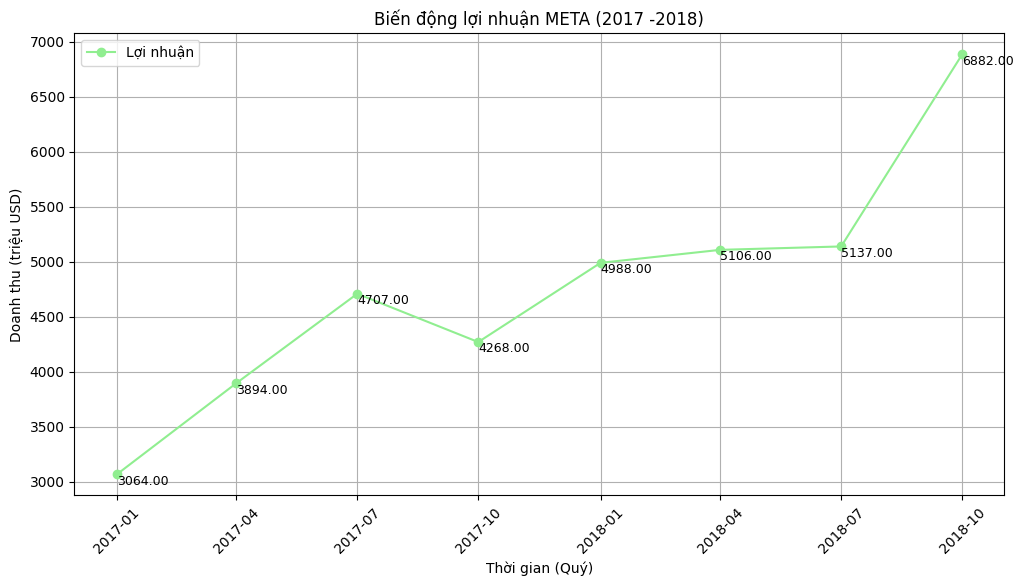

In [87]:
# lợi nhuận 

df_test = df_quarter[(df_quarter['Date'].dt.year >= 2017) & (df_quarter['Date'].dt.year <= 2018) ]

plt.figure(figsize=(12, 6))

plt.plot(df_test['Date'], df_test['Net Income'], marker='o', label='Lợi nhuận', color='lightgreen')

plt.title('Biến động lợi nhuận META (2017 -2018)')
for i, txt in enumerate(df_test['Net Income']):
    plt.text(df_test['Date'].iloc[i], txt, f'{txt:.2f}', fontsize=9, verticalalignment='top', horizontalalignment='left')

plt.xlabel('Thời gian (Quý)')
plt.ylabel('Doanh thu (triệu USD)')
plt.xticks(df_test['Date'], df_test['Date'].dt.strftime('%Y-%m'), rotation=45)
plt.grid(True)

plt.legend()

plt.show()

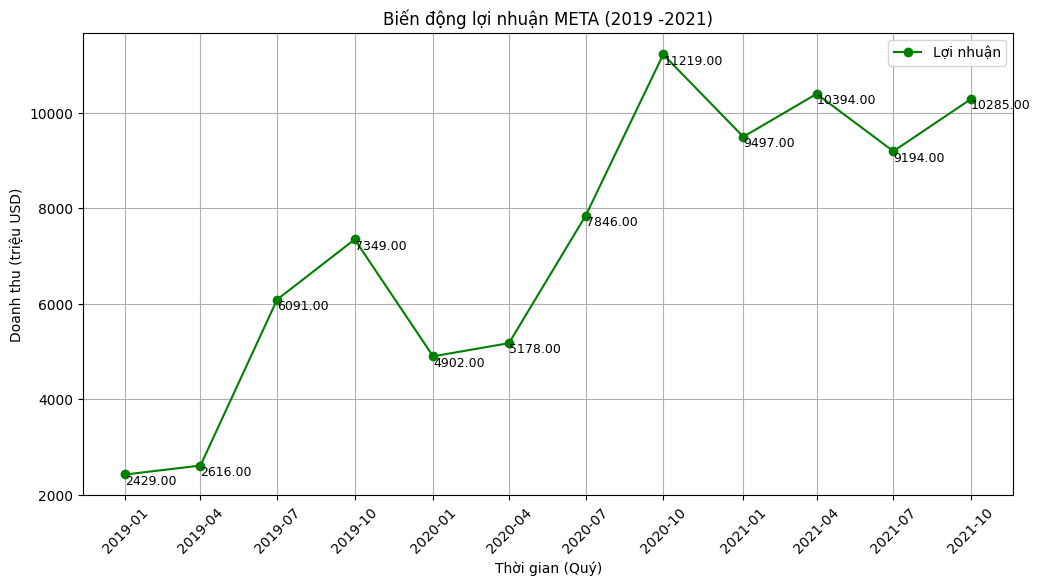

In [88]:
# lợi nhuận 

df_test = df_quarter[(df_quarter['Date'].dt.year >= 2019) & (df_quarter['Date'].dt.year <= 2021) ]

plt.figure(figsize=(12, 6))

plt.plot(df_test['Date'], df_test['Net Income'], marker='o', label='Lợi nhuận', color='green')

plt.title('Biến động lợi nhuận META (2019 -2021)')
for i, txt in enumerate(df_test['Net Income']):
    plt.text(df_test['Date'].iloc[i], txt, f'{txt:.2f}', fontsize=9, verticalalignment='top', horizontalalignment='left')

plt.xlabel('Thời gian (Quý)')
plt.ylabel('Doanh thu (triệu USD)')
plt.xticks(df_test['Date'], df_test['Date'].dt.strftime('%Y-%m'), rotation=45)
plt.grid(True)

plt.legend()

plt.show()

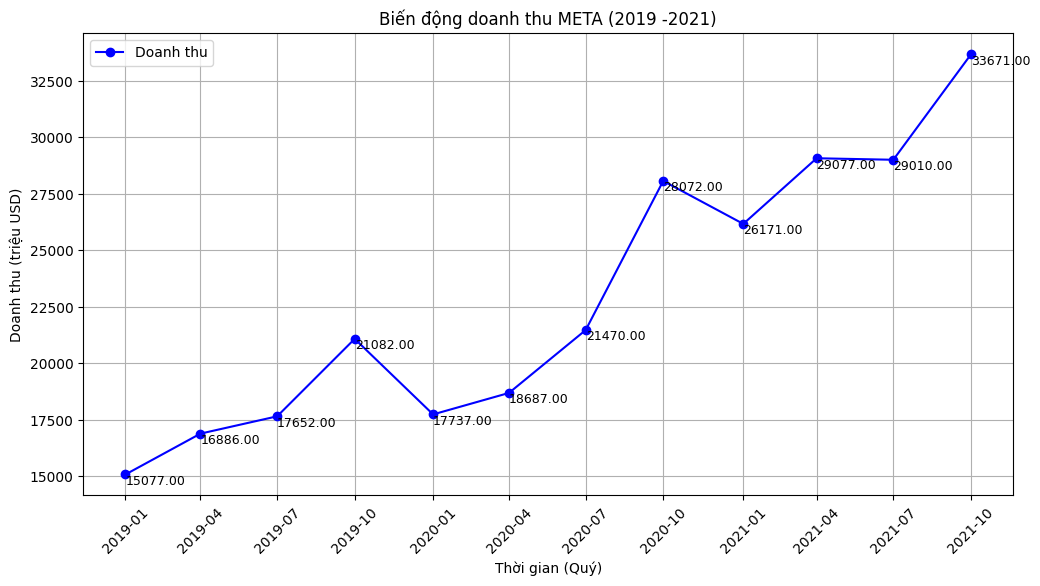

In [89]:
# Doanh thu 2019-2021

df_test = df_quarter[(df_quarter['Date'].dt.year >= 2019) & (df_quarter['Date'].dt.year <= 2021) ]

plt.figure(figsize=(12, 6))

plt.plot(df_test['Date'], df_test['Revenue'], marker='o', label='Doanh thu', color='blue')

plt.title('Biến động doanh thu META (2019 -2021)')
for i, txt in enumerate(df_test['Revenue']):
    plt.text(df_test['Date'].iloc[i], txt, f'{txt:.2f}', fontsize=9, verticalalignment='top', horizontalalignment='left')

plt.xlabel('Thời gian (Quý)')
plt.ylabel('Doanh thu (triệu USD)')
plt.xticks(df_test['Date'], df_test['Date'].dt.strftime('%Y-%m'), rotation=45)
plt.grid(True)

plt.legend()

plt.show()

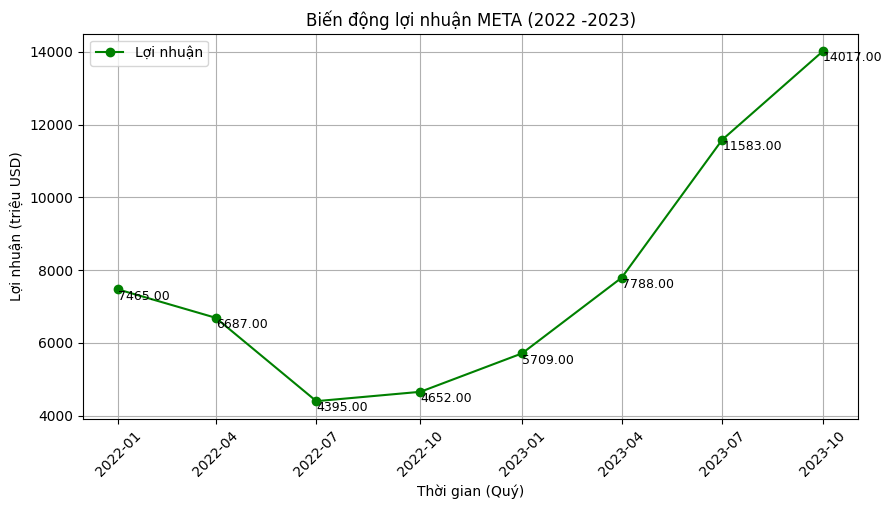

In [90]:
# Lợi nhuận 2022-2023
df_test = df_quarter[(df_quarter['Date'].dt.year >= 2022) & (df_quarter['Date'].dt.year <= 2023) ]

plt.figure(figsize=(10, 5))
plt.plot(df_test['Date'], df_test['Net Income'], marker='o', label='Lợi nhuận', color='green')
plt.title('Biến động lợi nhuận META (2022 -2023)')
for i, txt in enumerate(df_test['Net Income']):
    plt.text(df_test['Date'].iloc[i], txt, f'{txt:.2f}', fontsize=9, verticalalignment='top', horizontalalignment='left')
plt.xlabel('Thời gian (Quý)')
plt.ylabel('Lợi nhuận (triệu USD)')
plt.xticks(df_test['Date'], df_test['Date'].dt.strftime('%Y-%m'), rotation=45)
plt.grid(True)

plt.legend()
plt.show()

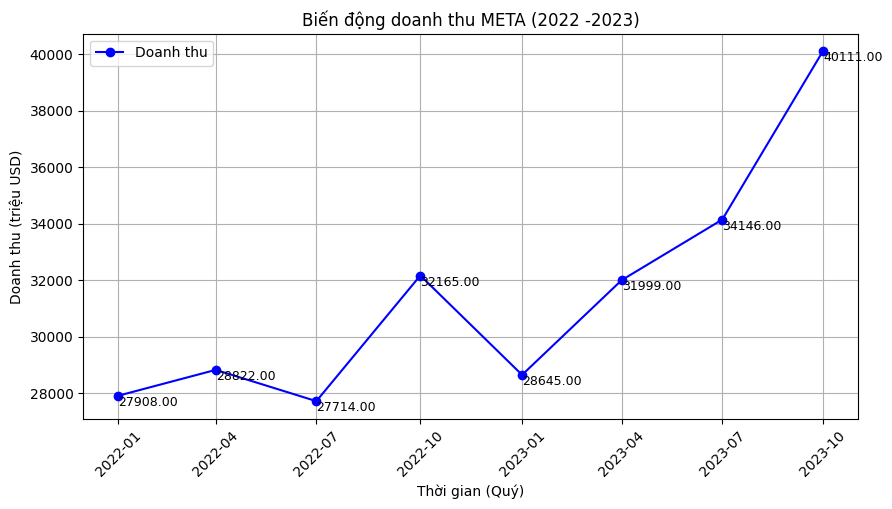

In [91]:
# Doanh thu 2022-2023
df_test = df_quarter[(df_quarter['Date'].dt.year >= 2022) & (df_quarter['Date'].dt.year <= 2023) ]
plt.figure(figsize=(10, 5))
plt.plot(df_test['Date'], df_test['Revenue'], marker='o', label='Doanh thu', color='blue')
plt.title('Biến động doanh thu META (2022 -2023)')
for i, txt in enumerate(df_test['Revenue']):
    plt.text(df_test['Date'].iloc[i], txt, f'{txt:.2f}', fontsize=9, verticalalignment='top', horizontalalignment='left')
plt.xlabel('Thời gian (Quý)')
plt.ylabel('Doanh thu (triệu USD)')
plt.xticks(df_test['Date'], df_test['Date'].dt.strftime('%Y-%m'), rotation=45)

plt.grid(True)

plt.legend()

plt.show()

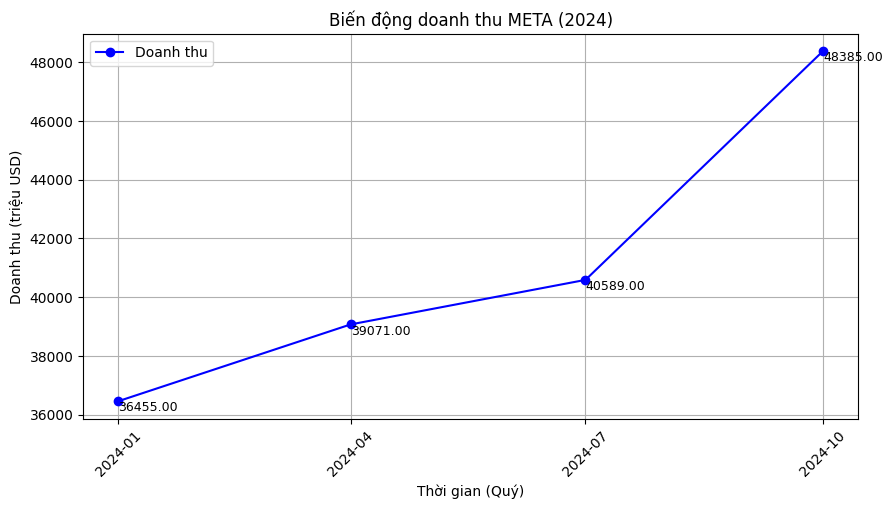

In [92]:
# Doanh thu 2024
df_test = df_quarter[(df_quarter['Date'].dt.year == 2024)]
plt.figure(figsize=(10, 5))
plt.plot(df_test['Date'], df_test['Revenue'], marker='o', label='Doanh thu', color='blue')
plt.title('Biến động doanh thu META (2024)')
for i, txt in enumerate(df_test['Revenue']):
    plt.text(df_test['Date'].iloc[i], txt, f'{txt:.2f}', fontsize=9, verticalalignment='top', horizontalalignment='left')
plt.xlabel('Thời gian (Quý)')
plt.ylabel('Doanh thu (triệu USD)')
plt.xticks(df_test['Date'], df_test['Date'].dt.strftime('%Y-%m'), rotation=45)

plt.grid(True)

plt.legend()

plt.show()

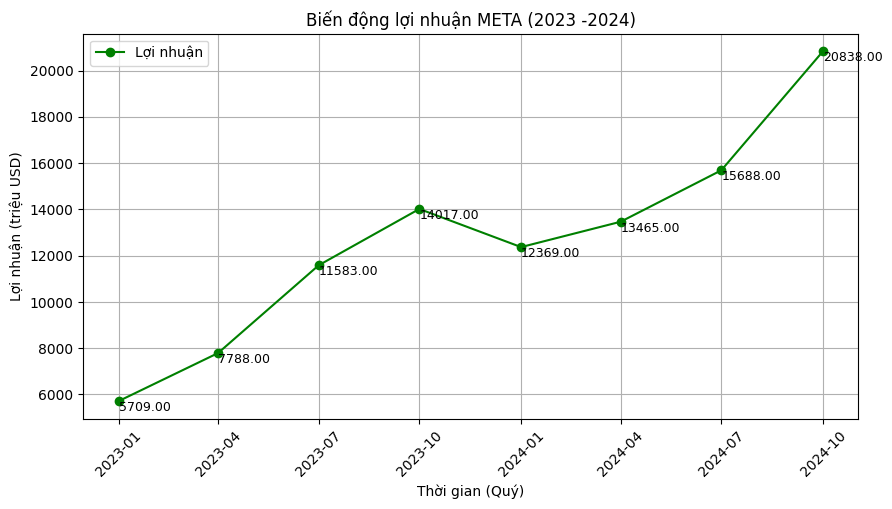

In [93]:
# Lợi nhuận 2024
df_test = df_quarter[(df_quarter['Date'].dt.year >= 2023) & (df_quarter['Date'].dt.year <= 2024) ]
plt.figure(figsize=(10, 5))
plt.plot(df_test['Date'], df_test['Net Income'], marker='o', label='Lợi nhuận', color='green')
plt.title('Biến động lợi nhuận META (2023 -2024)')
for i, txt in enumerate(df_test['Net Income']):
    plt.text(df_test['Date'].iloc[i], txt, f'{txt:.2f}', fontsize=9, verticalalignment='top', horizontalalignment='left')

plt.xlabel('Thời gian (Quý)')
plt.ylabel('Lợi nhuận (triệu USD)')
plt.xticks(df_test['Date'], df_test['Date'].dt.strftime('%Y-%m'), rotation=45)
plt.grid(True)

plt.legend()

plt.show()